In [1]:
import numpy as np

INVIVO_DATA_PATH = '/home/matt/repos/Research/Neuron_Burst_Analysis/data/invivo/LFP_data.npz'
INVIVO_RAW_PATH = '/home/matt/repos/Research/Neuron_Burst_Analysis/data/invivo/LFP_BLA_gamma.mat'

In [2]:
from scipy import signal, io
from lfp_prediction.config import params

oscBand = np.array([0.08,0.14])
z, a = signal.butter(4,oscBand,btype='bandpass')

mat = io.loadmat(INVIVO_RAW_PATH)['LFP_seg']
for arr in mat:
    if arr[0].shape[0] < (params.PREVIOUS_TIME + params.LOOK_AHEAD):
        continue
    i = 0
    t = i+params.PREVIOUS_TIME
    k = params.LOOK_AHEAD

    x = np.concatenate((arr[0][i:t,:], np.zeros((100, 1))), axis=0)
    y0 = signal.lfilter(z, a, x, axis=0)
    y1_in = np.concatenate((np.zeros((1024, 1)), arr[0][t:t+k]), axis=0)
    y1 = np.concatenate((np.zeros((1024, 1)), signal.lfilter(z, a, arr[0][t:t+k,:], axis=0)), axis=0)

    full_raw = arr[0][:t+k]
    full_filters = (signal.lfilter(z, a, arr[0][:t+k,:], axis=0))

print(arr[0].shape)

print(x.shape)
print(y0.shape)
print(y1_in.shape)
print(y1.shape)
print(full_raw.shape)
print(full_filters.shape)

(575921, 1)
(1124, 1)
(1124, 1)
(1124, 1)
(1124, 1)
(1124, 1)
(1124, 1)


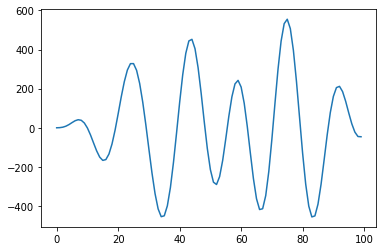

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(np.arange(100), y1[1024:,0])
plt.show()

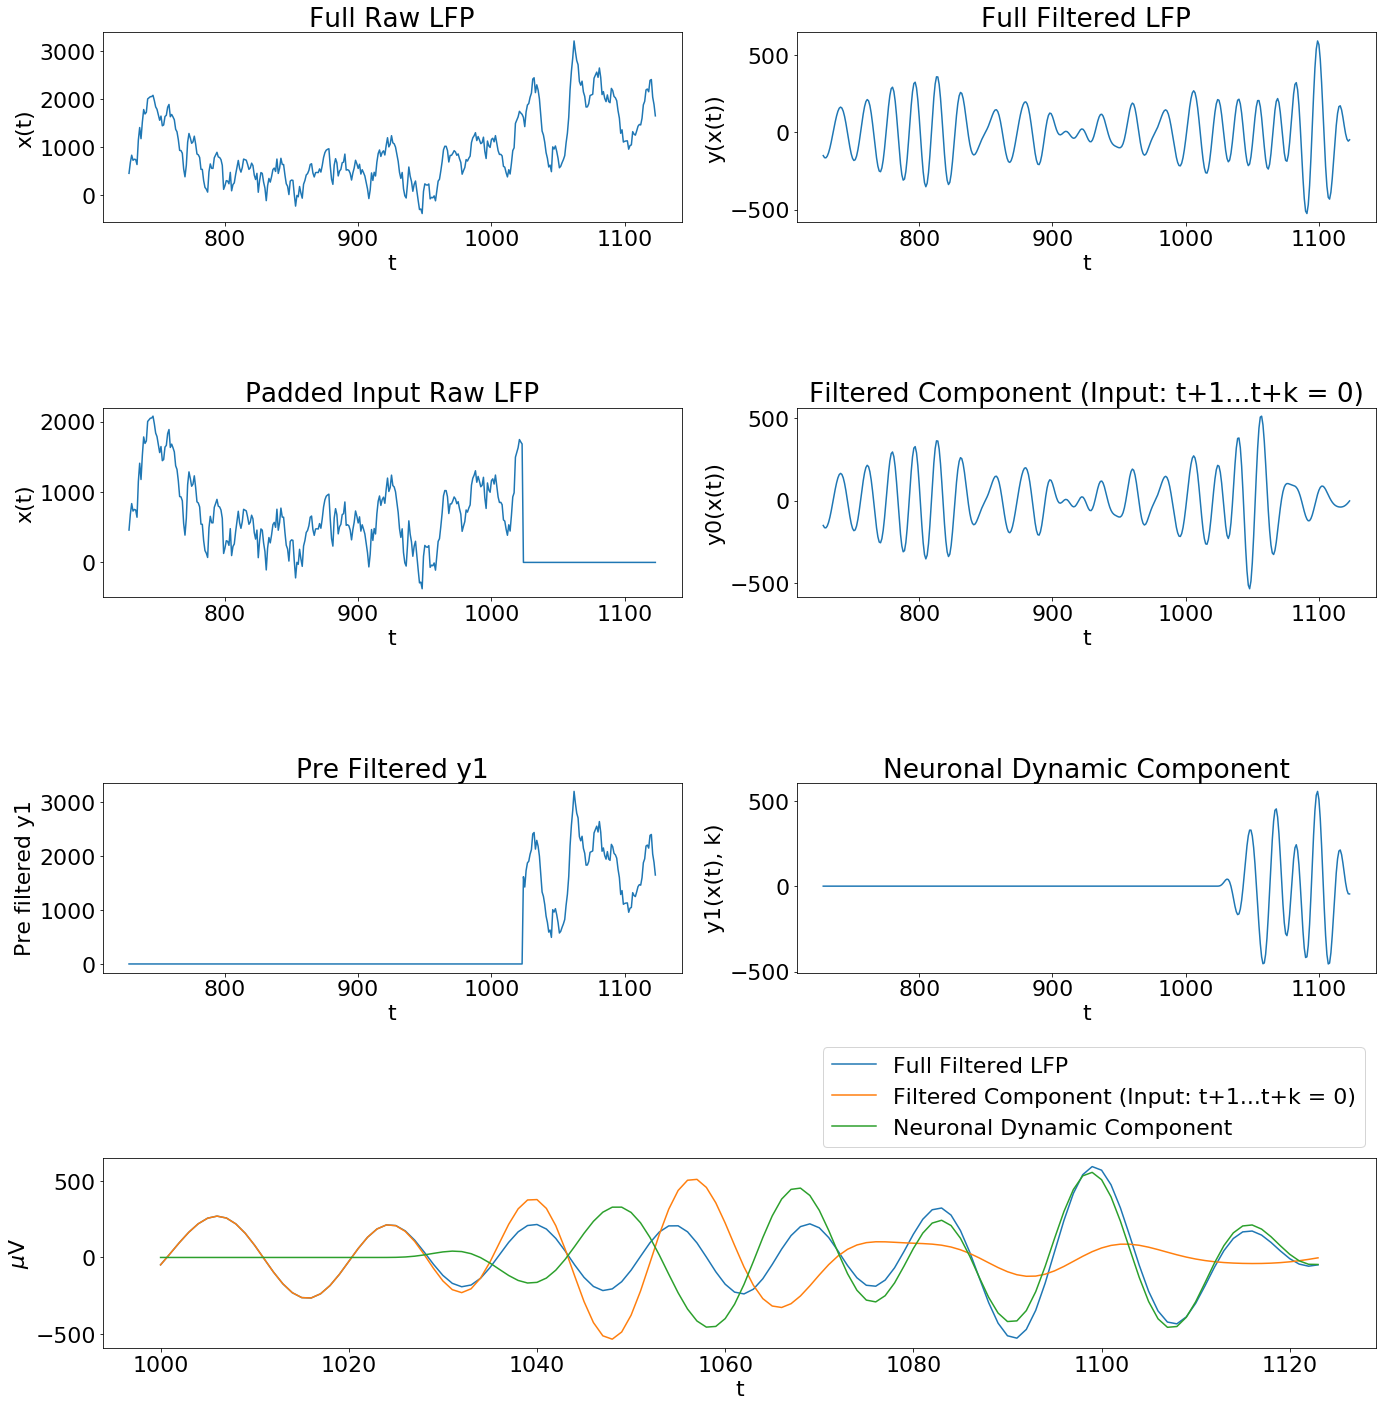

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.gridspec import GridSpec

plt.rcParams['figure.figsize'] = (20, 20)
plt.rcParams['font.size'] = 22

# fig, axs = plt.subplots(3, 2)
fig = plt.figure()
gs = GridSpec(4,2)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[2,0])
ax6 = fig.add_subplot(gs[2,1])
ax7 = fig.add_subplot(gs[3,:])

t = np.arange(0, 1124, 1)


time_var = 728

ax1.plot(t[time_var:], full_raw[time_var:,:])
ax1.set_xlabel('t')
ax1.set_ylabel('x(t)')
ax1.set_title('Full Raw LFP')

ax2.plot(t[time_var:], full_filters[time_var:,:])
ax2.set_xlabel('t')
ax2.set_ylabel('y(x(t))')
ax2.set_title('Full Filtered LFP')

ax3.plot(t[time_var:], x[time_var:,:])
ax3.set_xlabel('t')
ax3.set_ylabel('x(t)')
ax3.set_title('Padded Input Raw LFP')

ax4.plot(t[time_var:], y0[time_var:,:])
ax4.set_xlabel('t')
ax4.set_ylabel('y0(x(t))')
ax4.set_title('Filtered Component (Input: t+1...t+k = 0)')

ax5.plot(t[time_var:], y1_in[time_var:,:])
ax5.set_xlabel('t')
ax5.set_ylabel('Pre filtered y1')
ax5.set_title('Pre Filtered y1')

ax6.plot(t[time_var:], y1[time_var:,:])
ax6.set_xlabel('t')
ax6.set_ylabel('y1(x(t), k)')
ax6.set_title('Neuronal Dynamic Component')

ax7.plot(t[1000:], full_filters[1000:,:], label="Full Filtered LFP")
ax7.plot(t[1000:], y0[1000:,:], label="Filtered Component (Input: t+1...t+k = 0)")
ax7.plot(t[1000:], y1[1000:,:], label='Neuronal Dynamic Component')

ax7.legend(bbox_to_anchor=(1, 1), loc='lower right', ncol=1)
ax7.set_xlabel('t')
ax7.set_ylabel(r'$\mu$V')


fig.tight_layout()
plt.show()

/home/matt/venvs/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


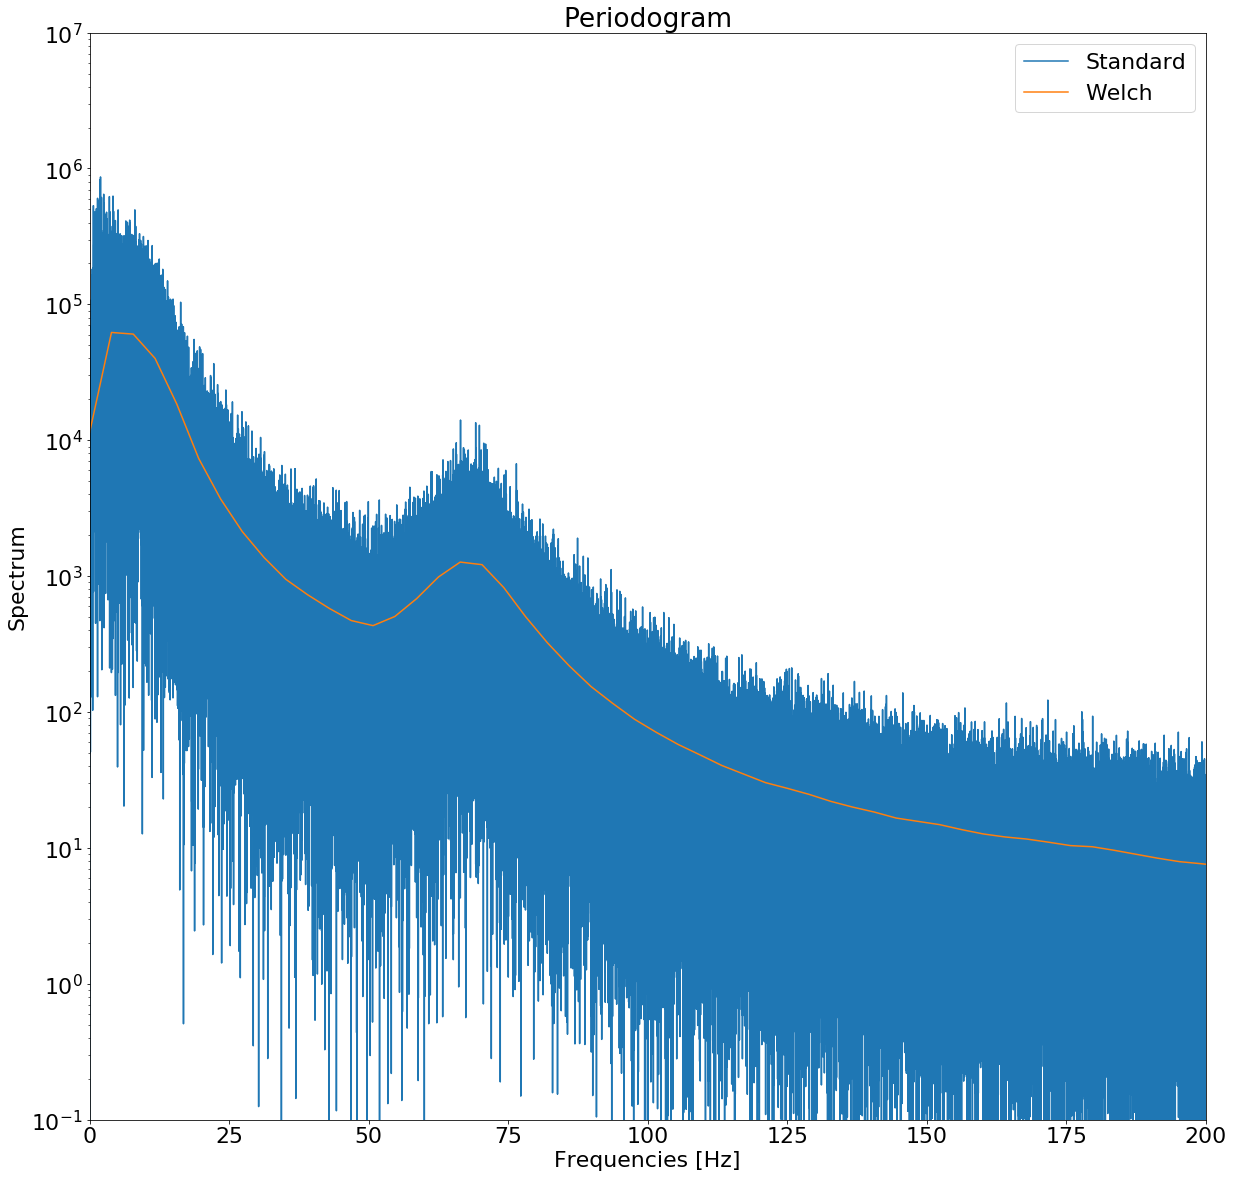

In [4]:
from scipy.signal import periodogram, welch

r_lfp = arr[0]

f, psd = periodogram(r_lfp, fs=1000, scaling='density', axis=0)
f_w, psd_w = welch(r_lfp, fs=1000, scaling='density', axis=0)
plt.semilogy(f, psd, label='Standard')
plt.semilogy(f_w, psd_w, label='Welch')
plt.ylim([1e-1, 1e7])
plt.xlim([0, 200])
plt.xlabel('Frequencies [Hz]')
plt.ylabel('Spectrum')
plt.title('Periodogram')
plt.legend()
plt.show()